In [0]:
%tensorflow_version 2.x
from __future__ import absolute_import, division, print_function, unicode_literals
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [2]:
# Download and prepare the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Create a list for their class_names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

170500096/170498071 [==============================] - 11s 0us/step


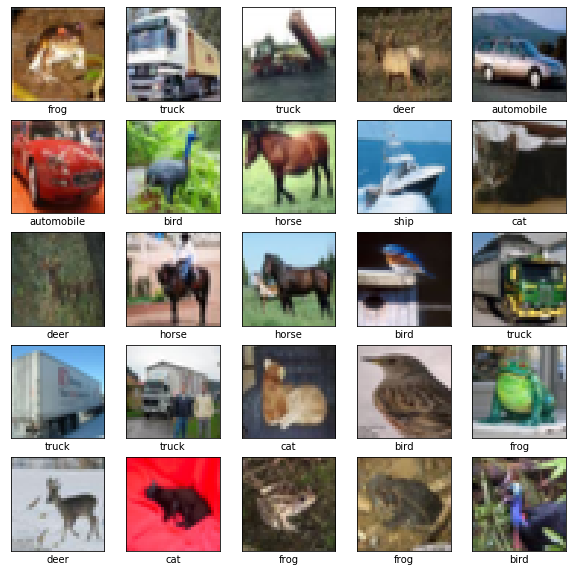

In [0]:
# Plot and find out their scales
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i]) # displays as grayscale
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [0]:
# Create the convolutional base. Use Conv2D and MaxPooling2D for 3D tensor of shape (height, width, channels).
# Notice the width and height dimensions tend to shrink deeper into the network. As height & width shrinks, can afford (computationally) to add more output channels in each conv2D layer.
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), input_shape=(32,32,3))) # 1st index of 32 refers to the output no. of channels
model.add(layers.LeakyReLU(alpha=0.1))
# can add dropout here
model.add(layers.MaxPooling2D((2,2))) # Pooling = combines four squares
model.add(layers.Conv2D(64,(3,3)))
model.add(layers.LeakyReLU())
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, (3,3)))
model.add(layers.LeakyReLU())

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [0]:
# Add Dense (Fully-Connected) Layers at the end to complete the model
model.add(layers.Flatten()) # Need to flatten before adding dense layers
model.add(layers.Dense(64, activation='relu')) # outputs 64 nodes
model.add(layers.Dense(10, activation='softmax')) # To output 10 classes
model.summary() # To see the network architecture

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 13, 13, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          3

In [0]:
# After setting up the architecture, compile and train the model now.
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy']) # sparse is for integer. non-sparse is for one-hot encoding [1,0,0]

history = model.fit(train_images, train_labels, batch_size = 1, epochs=10, verbose=1, validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 173s 3ms/sample - loss: 1.5843 - accuracy: 0.4306 - val_loss: 1.4093 - val_accuracy: 0.5073
Epoch 2/10
50000/50000 [==============================] - 167s 3ms/sample - loss: 1.3756 - accuracy: 0.5222 - val_loss: 1.3574 - val_accuracy: 0.5218
Epoch 3/10
50000/50000 [==============================] - 169s 3ms/sample - loss: 1.3293 - accuracy: 0.5489 - val_loss: 1.2543 - val_accuracy: 0.5638
Epoch 4/10
50000/50000 [==============================] - 169s 3ms/sample - loss: 1.2749 - accuracy: 0.5708 - val_loss: 1.1993 - val_accuracy: 0.5992
Epoch 5/10
50000/50000 [==============================] - 164s 3ms/sample - loss: 1.2527 - accuracy: 0.5852 - val_loss: 1.3271 - val_accuracy: 0.5526
Epoch 6/10
50000/50000 [==============================] - 162s 3ms/sample - loss: 1.2481 - accuracy: 0.5992 - val_loss: 1.1660 - val_accuracy: 0.6214
Epoch 7/10
50000/50000 [==========================

10000/10000 - 1s - loss: 1.4962 - accuracy: 0.5597


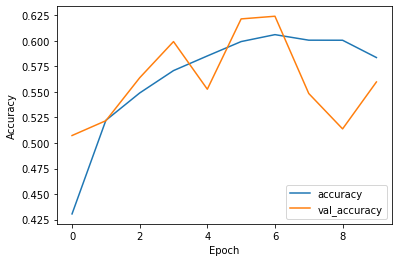

In [0]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

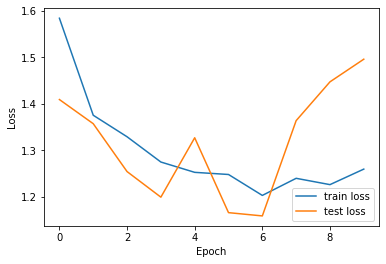

In [0]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')